In [1]:
import pandas as pd
from atomsci.ddm.utils.struct_utils import base_smiles_from_smiles

In [10]:
datafile='../data/flavivirus_docking_results/protease_ligand_prep.csv'

In [12]:
odir='../data'

In [11]:
df=pd.read_csv(datafile)

In [5]:
dengdf=df[df['source'].str.find('dengue') == 0]
dengdf

,id,compound_id,base_rdkit_smiles,relation,aval,source,moe_washed,%C,FCharge,Weight,RBC
0,1,125137506,O=C(NCc1ccc(NC(=N)N)cc1)[C@@](NC(=O)C)c1ccc(OC...,NaN,0.000000,dengue_protease_curated_inactive_d2.csv,O=C(NCc1ccc(NC(=[N+])N)cc1)[C@@](NC(=O)C)c1ccc...,99.101807,1,445.52298,9
1,2,124631474,S(=O)(=O)(N1[C@@](C(=O)Nc2sc3c(n2)cc(O)c(O)c3)...,NaN,0.000000,dengue_protease_curated_inactive_d2.csv,S(=O)(=O)(N1[C@@](C(=O)Nc2sc3c(n2)cc(O)c(O)c3)...,99.166336,0,526.59399,5
2,3,124631475,S(=O)(=O)(N1[C@](C(=O)Nc2sc3c(n2)cc(O)c(O)c3)C...,NaN,0.000000,dengue_protease_curated_inactive_d2.csv,S(=O)(=O)(N1[C@](C(=O)Nc2sc3c(n2)cc(O)c(O)c3)C...,99.166336,0,526.59399,5
3,4,125671528,O=C(N[C@@](C(=O)N[C@](C(=O)N)C(C)(C)C)c1ccc(OC...,<,0.000000,dengue_protease_curated_inactive_d2.csv,O=C(N[C@@](C(=O)N[C@](C(=O)N)C(C)(C)C)c1ccc(OC...,99.918121,1,601.74799,15
4,5,125606036,O=C(Nc1cc(C(=O)N)ccc1)[C@@](NC(=O)c1ccc(OCCC(C...,NaN,0.000000,dengue_protease_curated_inactive_d2.csv,O=C(Nc1cc(C(=O)N)ccc1)[C@@](NC(=O)c1ccc(OCCC(C...,100.000000,0,565.66998,13
...,...,...,...,...,...,...,...,...,...,...,...
1343,1344,122741008,O=C1C(O)=C(c2ccc(O)cc2)Oc2c1c(O)cc(O)c2,NaN,4.633940,dengue_protease_curated_pki.csv,O=C1C(=O)c2c([O-])cc(O)cc2O[C@]1c1ccc(O)cc1,64.642097,-1,286.23898,1
1344,1345,122741005,O=C1C(O[C@]2[C@](O)[C@@](O)[C@](O)[C@@](CO)O2)...,NaN,4.508663,dengue_protease_curated_pki.csv,O=C1C(O[C@]2[C@](O)[C@@](O)[C@](O)[C@@](CO)O2)...,40.335110,-1,464.37900,4
1345,1346,122741003,O=C1c2c(O)cc(O)c(-c3c(O)c4C(=O)C=C(c5ccc(O)cc5...,NaN,4.884993,dengue_protease_curated_pki.csv,O=C1c2c([O-])cc(O)c(-c3c([O-])c4C(=O)C=C(c5ccc...,18.294270,-2,538.46399,2
1346,1347,121839229,O=C1c2c(OC(c3ccccc3)=C1)ccc(-c1nnn[n-]1)c2,NaN,4.161151,dengue_protease_curated_pki.csv,O=C1c2c(OC(c3ccccc3)=C1)ccc(-c1nnn[n-]1)c2,92.766754,-1,289.27399,2


<Axes: >

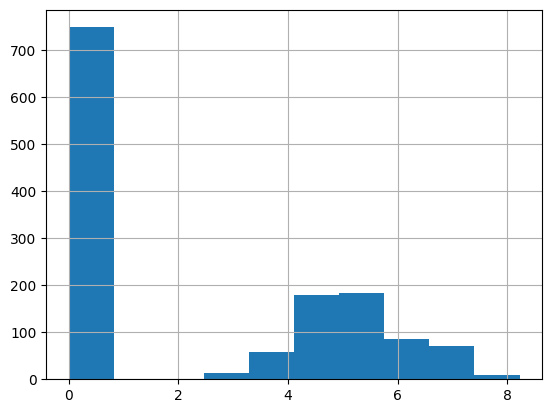

In [7]:
dengdf['aval'].hist()

In [13]:
params = {
    # dataset info
    "dataset_key" : datafile,
    "response_cols" : "aval",
    "id_col": "compound_id",
    "smiles_col" : "base_rdkit_smiles",
    "result_dir": odir,

    # splitting
    "split_only": "True",
    "previously_split": "False",
    "splitter": 'scaffold',
    "split_valid_frac": "0.15",
    "split_test_frac": "0.15",

    # featurization & training params
    "featurizer": "computed_descriptors",
    "descriptor_type" : "rdkit_raw",
    "previously_featurized": "True",
}

In [14]:
from atomsci.ddm.pipeline import model_pipeline as mp
from atomsci.ddm.pipeline import parameter_parser as parse

pparams = parse.wrapper(params)
MP = mp.ModelPipeline(pparams)
split_uuid = MP.split_dataset()

2024-07-12 17:12:41.754463: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 17:12:47.346652: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 17:12:47.346738: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 17:12:47.360116: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 17:12:49.549959: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-12 17:12:49.567156: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [16]:
# display the split file location
import glob
import os
dirname = os.path.dirname(params['dataset_key'])
split_file = glob.glob(f"{dirname}/*{split_uuid}*")[0]
split_file

'../data/flavivirus_docking_results/protease_ligand_prep_train_valid_test_scaffold_63b88a0a-ca21-4da0-93e5-3024e2406ef3.csv'

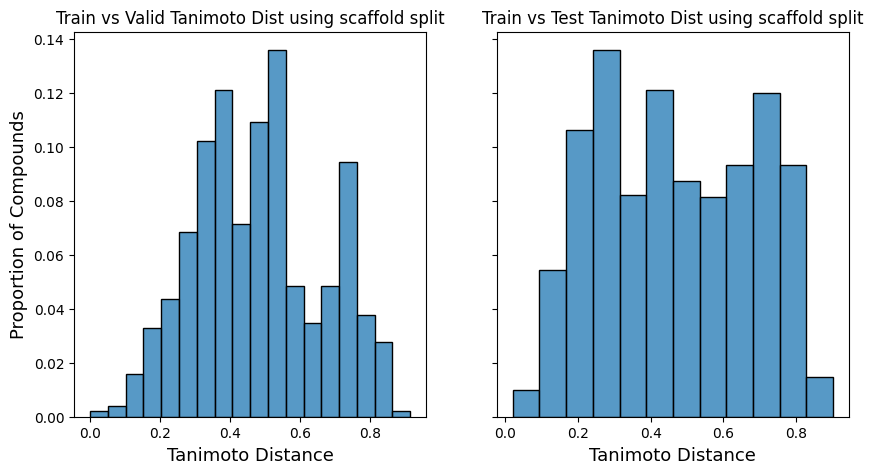

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import atomsci.ddm.utils.compare_splits_plots as csp

# read the dataset
#df = pd.read_csv('dataset/SLC6A3_Ki_curated.csv')

# read the split file
split = pd.read_csv(split_file)
split_type = params['splitter']

# create SplitStats
ss = csp.SplitStats(dengdf, split, smiles_col='base_rdkit_smiles', id_col='compound_id', response_cols=['aval'])

# plot
fig, ax = plt.subplots(1,2, sharey=True, figsize=(10,5))
ss.dist_hist_train_v_valid_plot(ax=ax[0])
ax[0].set_title(f"Train vs Valid Tanimoto Dist using {split_type} split")
ss.dist_hist_train_v_test_plot(ax=ax[1])
ax[1].set_title(f"Train vs Test Tanimoto Dist using {split_type} split");